## **📌 Import Libraries**

In [ ]:
# importing libraries
import pandas as pd
import scipy as stats
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

## **📌 Ektraksi Data**

In [ ]:
# URL CSV dari gdrive
url = "https://docs.google.com/spreadsheets/d/1E6MXICNwM-nUa9Pp-mB0dH2u1sa2uB-T/gviz/tq?tqx=out:csv"

# Load data ke dalam dataframe
df = pd.read_csv(url)
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Unnamed: 25
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1.0,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1.0,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,NaN
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1.0,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,NaN
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,1.0,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,1.0,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,dopeySheep0297@icloud.com,Sarjana,1.0,NaN,NaN,1973-12-08,2011-9-26,2016-03-01,-,NaN
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,yearningPorpoise4421@yahoo.com,Sarjana,1.0,NaN,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15,NaN
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,murkySausage9688@yahoo.com,Sarjana,1.0,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08,NaN
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,truthfulMoth4663@yahoo.com,Sarjana,1.0,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01,NaN


# **📌 Duplicate, Missing & Invalid Value**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

1. TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, TanggalResign = Harus dikonversi ke format datetime.

2. Format yang berisi angka di konversi ke format integer



## **Handling Duplicate**

In [ ]:
# Mengecek duplikat di setiap kolom
for column in df.columns:
    column_duplicates = df[column].duplicated().sum()
    print(f'Jumlah duplikat di kolom "{column}": {column_duplicates}')

# Mengecek duplikat keseluruhan untuk seluruh baris (jika ingin)
total_duplicates = df.duplicated().sum()
print(f'Jumlah duplikat keseluruhan di seluruh baris: {total_duplicates}')

# Menghitung persentase duplikat
duplicate_percentage = (total_duplicates / len(df)) * 100
print(f'Persentase duplikat: {duplicate_percentage:.2f}%')

Jumlah duplikat di kolom "Username": 2
Jumlah duplikat di kolom "EnterpriseID": 0
Jumlah duplikat di kolom "StatusPernikahan": 282
Jumlah duplikat di kolom "JenisKelamin": 285
Jumlah duplikat di kolom "StatusKepegawaian": 284
Jumlah duplikat di kolom "Pekerjaan": 273
Jumlah duplikat di kolom "JenjangKarir": 284
Jumlah duplikat di kolom "PerformancePegawai": 282
Jumlah duplikat di kolom "AsalDaerah": 282
Jumlah duplikat di kolom "HiringPlatform": 278
Jumlah duplikat di kolom "SkorSurveyEngagement": 282
Jumlah duplikat di kolom "SkorKepuasanPegawai": 281
Jumlah duplikat di kolom "JumlahKeikutsertaanProjek": 277
Jumlah duplikat di kolom "JumlahKeterlambatanSebulanTerakhir": 279
Jumlah duplikat di kolom "JumlahKetidakhadiran": 264
Jumlah duplikat di kolom "NomorHP": 0
Jumlah duplikat di kolom "Email": 0
Jumlah duplikat di kolom "TingkatPendidikan": 284
Jumlah duplikat di kolom "PernahBekerja": 285
Jumlah duplikat di kolom "IkutProgramLOP": 284
Jumlah duplikat di kolom "AlasanResign": 275
J

In [ ]:
# Memeriksa baris duplikat
duplicate_rows = df.duplicated()

# Menampilkan jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows.sum()}")

# Menampilkan baris duplikat
if duplicate_rows.sum() > 0:
    print("Baris duplikat:")
    print(df[duplicate_rows])
else:
    print("Tidak ada baris duplikat.")

Jumlah baris duplikat: 0
Tidak ada baris duplikat.


## **Handling Missing Value**

In [ ]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: True


,Total Null Values,Percentage,Data Type
Unnamed: 25,287,100.000000,float64
IkutProgramLOP,258,89.895470,object
AlasanResign,66,22.996516,object
JumlahKetidakhadiran,6,2.090592,object
SkorKepuasanPegawai,5,1.742160,object
JumlahKeikutsertaanProjek,3,1.045296,object
PernahBekerja,1,0.348432,float64
JumlahKeterlambatanSebulanTerakhir,1,0.348432,float64
Username,0,0.000000,object
EnterpriseID,0,0.000000,int64


1. Unnamed: 25 (100% kosong)	Hapus Kolom

2. IkutProgramLOP (89.89%)	Isi dengan '0'

3. AlasanResign (22.99%)	Isi dengan 'Masih Bekerja'

4. JumlahKetidakhadiran (2.09%)	Isi dengan 0

5. SkorKepuasanPegawai (1.74%)	Isi dengan Median

6. JumlahKeikutsertaanProjek (1.04%)	Isi
dengan 0

7. PernahBekerja (0.34%)	di cek nilai unique nya

8. JumlahKeterlambatanSebulanTerakhir (0.34%) di cek nilai unique nya

In [ ]:
print(df.head(10).to_string())
print("...")  # Indicate middle rows are omitted
print(df.tail(10).to_string())

            Username  EnterpriseID StatusPernikahan JenisKelamin StatusKepegawaian                      Pekerjaan           JenjangKarir PerformancePegawai       AsalDaerah     HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP                            Email TingkatPendidikan  PernahBekerja  IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  Unnamed: 25
0  spiritedPorpoise3        111065    Belum_menikah         Pria         Outsource   Software Engineer (Back End)  Freshgraduate_program       Sangat_bagus    Jakarta Timur  Employee_Referral                     4                  4.0                        0.0                                 0.0                   9.0  +6282232522xxx   spiritedPorpoise3135@yahoo.com          Magister            1.0             1.0  masih_bekerja   1972-07-01    2011-01-10                2016-2-15    

In [ ]:
# Hapus kolom unnamedL25
df = df.drop(columns=['Unnamed: 25'])

# Mengisi kolom IkutProgramLOP Nan = 0 (dianggap belum mengikuti)
df['IkutProgramLOP'] = df['IkutProgramLOP'].fillna('0')

# Mmengisi AlasanResign Nan disi = "masih_bekerja" jika TanggalResign bernilai "-"
df.loc[df['TanggalResign'] == '-', 'AlasanResign'] = 'masih_bekerja'

# JumlahKetidakhadiran Nan = 0 (logis)
df['JumlahKetidakhadiran'] = df['JumlahKetidakhadiran'].fillna(0)

# SkorKepuasanPegawai Nan = median
median_skor = df['SkorKepuasanPegawai'].median()
df['SkorKepuasanPegawai'] = df['SkorKepuasanPegawai'].fillna(median_skor)

# JumlahKeikutsertaanProjek = 0 (75% karyawan tidak ikut proyek)
df['JumlahKeikutsertaanProjek'] = df['JumlahKeikutsertaanProjek'].fillna(0)

# JumlahKeterlambatanSebulanTerakhir = di isi 0 (logis)
df['JumlahKeterlambatanSebulanTerakhir'] = df['JumlahKeterlambatanSebulanTerakhir'].fillna(0)

In [ ]:
# Cek nilai unik pada kolom PernahBekerja
unique_pernah_bekerja = df['PernahBekerja'].unique()
print("Nilai unik pada kolom PernahBekerja:", unique_pernah_bekerja)

# Jika ingin menghitung jumlah setiap nilai unik:
value_counts_pernah_bekerja = df['PernahBekerja'].value_counts()
print("\nJumlah setiap nilai unik pada kolom PernahBekerja:\n", value_counts_pernah_bekerja)


Nilai unik pada kolom PernahBekerja: [ 1. nan]

Jumlah setiap nilai unik pada kolom PernahBekerja:
 PernahBekerja
1.0    286
Name: count, dtype: int64


In [ ]:
# prompt: isi nilai nan pada kolom PernahBekerja dengan rata-rata

# Isi nilai NaN pada kolom PernahBekerja dengan rata-rata
mean_pernah_bekerja = df['PernahBekerja'].mean()
df['PernahBekerja'] = df['PernahBekerja'].fillna(mean_pernah_bekerja)


In [ ]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
nvc.style.background_gradient(cmap='Blues')

Missing values status: False


,Total Null Values,Percentage,Data Type
Username,0,0.000000,object
EnterpriseID,0,0.000000,int64
StatusPernikahan,0,0.000000,object
JenisKelamin,0,0.000000,object
StatusKepegawaian,0,0.000000,object
Pekerjaan,0,0.000000,object
JenjangKarir,0,0.000000,object
PerformancePegawai,0,0.000000,object
AsalDaerah,0,0.000000,object
HiringPlatform,0,0.000000,object


In [ ]:
# Cari kolom yang hanya memiliki satu nilai unik
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

# Tampilkan daftar kolom yang akan dibuang
print("Kolom dengan satu unique value:", constant_cols)

# Hapus kolom-kolom
df.drop(columns=constant_cols, inplace=True)

Kolom dengan satu unique value: ['PernahBekerja']


In [ ]:
print(df.head(10).to_string())
print("...")  # Indicate middle rows are omitted
print(df.tail(10).to_string())

            Username  EnterpriseID StatusPernikahan JenisKelamin StatusKepegawaian                      Pekerjaan           JenjangKarir PerformancePegawai       AsalDaerah     HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP                            Email TingkatPendidikan IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign
0  spiritedPorpoise3        111065    Belum_menikah         Pria         Outsource   Software Engineer (Back End)  Freshgraduate_program       Sangat_bagus    Jakarta Timur  Employee_Referral                     4                  4.0                        0.0                                 0.0                   9.0  +6282232522xxx   spiritedPorpoise3135@yahoo.com          Magister            1.0  masih_bekerja   1972-07-01    2011-01-10                2016-2-15             -
1    jealousGelding2        106080

## **Handling Invalid Value**

In [ ]:
# Konversi kolom tanggal ke format datetime
for column in ['TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan',
               'TanggalResign']:
  if column in df.columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# List kolom yang berisi angka dan perlu dikonversi ke integer
numeric_columns = [
    'EnterpriseID',
    'SkorSurveyEngagement',
    'SkorKepuasanPegawai',
    'JumlahKeikutsertaanProjek',
    'JumlahKeterlambatanSebulanTerakhir',
    'JumlahKetidakhadiran','IkutProgramLOP'
]

df[numeric_columns] = df[numeric_columns].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

<ipython-input-191-8939d3cafeb5>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='coerce')


# 📌 **Annual Report on Employee Number Changes**

In [ ]:
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,9,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,3,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,11,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,6,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,11,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,16,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,0,masih_bekerja,1973-12-08,2011-09-26,2016-03-01,NaT
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,11,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,0,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,17,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,20,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,0,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01


In [ ]:
# Konversi ke format tahun
df['TahunHiring'] = df['TanggalHiring'].dt.year
df['TahunResign'] = df['TanggalResign'].dt.year
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,Email,TingkatPendidikan,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,spiritedPorpoise3135@yahoo.com,Magister,1,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,NaT,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,jealousGelding2239@yahoo.com,Sarjana,1,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-06-16,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,pluckyMuesli3961@icloud.com,Magister,1,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,stressedTruffle1406@hotmail.com,Sarjana,0,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,shyTermite7149@gmail.com,Sarjana,0,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06,2013,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,dopeySheep0297@icloud.com,Sarjana,0,masih_bekerja,1973-12-08,2011-09-26,2016-03-01,NaT,2011,NaN
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,yearningPorpoise4421@yahoo.com,Sarjana,0,jam_kerja,1974-12-01,2013-05-13,2020-01-28,2017-11-15,2013,2017.0
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,murkySausage9688@yahoo.com,Sarjana,1,ganti_karir,1969-10-30,2013-11-11,2020-01-21,2018-06-08,2013,2018.0
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,truthfulMoth4663@yahoo.com,Sarjana,0,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,2018-04-01,2011,2018.0


In [ ]:
# Agregasi jumlah karyawan yang masuk per tahun
hiring_per_tahun = df.groupby('TahunHiring').agg(JumlahKaryawanMasuk=('TahunHiring', 'count')).reset_index()

# Agregasi jumlah karyawan yang keluar per tahun (tidak termasuk yang masih aktif)
resign_per_tahun = df.dropna(subset=['TahunResign']).groupby('TahunResign').agg(JumlahKaryawanKeluar=('TahunResign', 'count')).reset_index()


In [ ]:
# Tampilkan hasil
print("Jumlah Karyawan Masuk per Tahun:")
print(hiring_per_tahun)
print("\nJumlah Karyawan Keluar per Tahun:")
print(resign_per_tahun)

Jumlah Karyawan Masuk per Tahun:
    TahunHiring  JumlahKaryawanMasuk
0          2006                    1
1          2007                    2
2          2008                    2
3          2009                    7
4          2010                    8
5          2011                   76
6          2012                   41
7          2013                   43
8          2014                   56
9          2015                   31
10         2016                   14
11         2017                    5
12         2018                    1

Jumlah Karyawan Keluar per Tahun:
   TahunResign  JumlahKaryawanKeluar
0       2013.0                     5
1       2014.0                    12
2       2015.0                     8
3       2016.0                     8
4       2017.0                    19
5       2018.0                    26
6       2019.0                     5
7       2020.0                     6


In [ ]:
# Gabungkan kedua tabel dengan outer join
employee_changes = pd.merge(hiring_per_tahun, resign_per_tahun, left_on='TahunHiring', right_on='TahunResign', how='outer')

Kenapa pakai Outer Join?

Memastikan semua tahun hiring dan resign tetap ada di tabel.

Jika hanya pakai inner join, tahun yang tidak ada di kedua tabel akan hilang.

In [ ]:
employee_changes

,TahunHiring,JumlahKaryawanMasuk,TahunResign,JumlahKaryawanKeluar
0,2006.0,1.0,NaN,NaN
1,2007.0,2.0,NaN,NaN
2,2008.0,2.0,NaN,NaN
3,2009.0,7.0,NaN,NaN
4,2010.0,8.0,NaN,NaN
5,2011.0,76.0,NaN,NaN
6,2012.0,41.0,NaN,NaN
7,2013.0,43.0,2013.0,5.0
8,2014.0,56.0,2014.0,12.0
9,2015.0,31.0,2015.0,8.0


In [ ]:
# 1. Buat kolom 'Tahun' dengan mengambil nilai yang ada dari TahunHiring dan TahunResign
employee_changes['Tahun'] = employee_changes[['TahunHiring', 'TahunResign']].max(axis=1)

# Isi nilai kosong pada TahunHiring dan TahunResign agar tetap berurutan
employee_changes['TahunHiring'] = employee_changes['TahunHiring'].fillna(employee_changes['Tahun'])
employee_changes['TahunResign'] = employee_changes['TahunResign'].fillna(employee_changes['Tahun'])

# Isi nilai NaN pada kolom JumlahKaryawanMasuk dan JumlahKaryawanKeluar dengan 0
employee_changes[['JumlahKaryawanMasuk', 'JumlahKaryawanKeluar']] = employee_changes[['JumlahKaryawanMasuk', 'JumlahKaryawanKeluar']].fillna(0)


# Urutkan berdasarkan TahunHiring setelah imputasi
employee_changes = employee_changes.sort_values(by='TahunHiring', ascending=True).reset_index(drop=True)

# 3. Pastikan semua nilai sudah terisi
employee_changes

,TahunHiring,JumlahKaryawanMasuk,TahunResign,JumlahKaryawanKeluar,Tahun
0,2006.0,1.0,2006.0,0.0,2006.0
1,2007.0,2.0,2007.0,0.0,2007.0
2,2008.0,2.0,2008.0,0.0,2008.0
3,2009.0,7.0,2009.0,0.0,2009.0
4,2010.0,8.0,2010.0,0.0,2010.0
5,2011.0,76.0,2011.0,0.0,2011.0
6,2012.0,41.0,2012.0,0.0,2012.0
7,2013.0,43.0,2013.0,5.0,2013.0
8,2014.0,56.0,2014.0,12.0,2014.0
9,2015.0,31.0,2015.0,8.0,2015.0


In [ ]:
# Inisialisasi nilai awal
total_karyawan = 0  # Jumlah karyawan bertahan
total_resign = 0  # Jumlah total karyawan yang resign

# Buat kolom kosong untuk menyimpan hasil perhitungan
employee_changes['TotalKaryawan'] = 0
employee_changes['TotalResign'] = 0
employee_changes['Perubahan'] = 0

# Looping untuk menghitung total karyawan dan perubahan setiap tahun
for i in range(len(employee_changes)):
    # Ambil jumlah masuk dan keluar pada tahun tersebut
    masuk = employee_changes.loc[i, 'JumlahKaryawanMasuk']
    keluar = employee_changes.loc[i, 'JumlahKaryawanKeluar']

    # Update total karyawan bertahan
    total_karyawan += masuk - keluar
    total_resign += keluar  # Total yang sudah resign bertambah

    # Simpan hasil ke dalam dataframe
    employee_changes.loc[i, 'TotalKaryawan'] = total_karyawan
    employee_changes.loc[i, 'TotalResign'] = total_resign
    employee_changes.loc[i, 'Perubahan'] = masuk - keluar

# Hapus kolom 'Tahun'
employee_changes.drop(columns=['Tahun'], inplace=True)

employee_changes


,TahunHiring,JumlahKaryawanMasuk,TahunResign,JumlahKaryawanKeluar,TotalKaryawan,TotalResign,Perubahan
0,2006.0,1.0,2006.0,0.0,1,0,1
1,2007.0,2.0,2007.0,0.0,3,0,2
2,2008.0,2.0,2008.0,0.0,5,0,2
3,2009.0,7.0,2009.0,0.0,12,0,7
4,2010.0,8.0,2010.0,0.0,20,0,8
5,2011.0,76.0,2011.0,0.0,96,0,76
6,2012.0,41.0,2012.0,0.0,137,0,41
7,2013.0,43.0,2013.0,5.0,175,5,38
8,2014.0,56.0,2014.0,12.0,219,17,44
9,2015.0,31.0,2015.0,8.0,242,25,23


## **Change in Employee Count By Year**

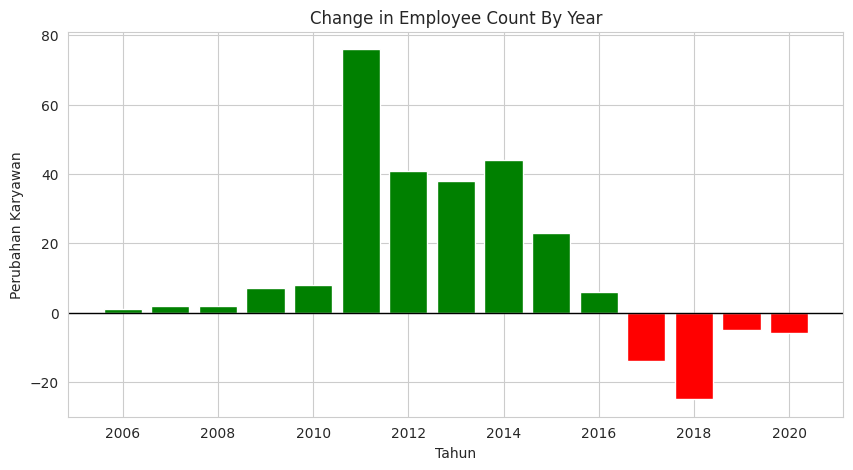

In [ ]:
plt.figure(figsize=(10,5))

# Plot batang dengan warna berdasarkan nilai perubahan (hijau untuk naik, merah untuk turun)
plt.bar(employee_changes["TahunHiring"], employee_changes["Perubahan"],
        color=['green' if x >= 0 else 'red' for x in employee_changes["Perubahan"]])

# Menambahkan label
plt.xlabel("Tahun")
plt.ylabel("Perubahan Karyawan")
plt.title("Change in Employee Count By Year")
plt.axhline(0, color='black', linewidth=1)  # Garis tengah nol
plt.show()

## **Total Employees vs. Total Resignations by Year**

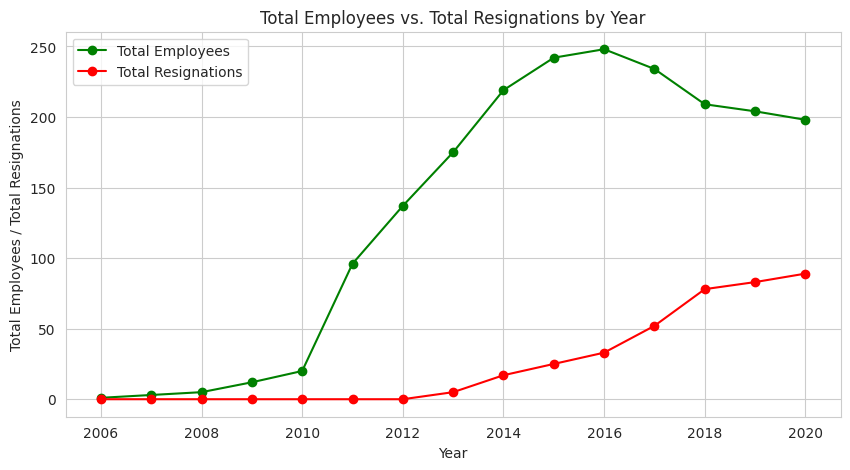

In [ ]:
# Setup figure
plt.figure(figsize=(10, 5))

# Plot Total Employees (Garis Hijau)
plt.plot(employee_changes["TahunHiring"], employee_changes["TotalKaryawan"],
         marker="o", linestyle="-", color="green", label="Total Employees")

# Plot Total Resignations (Garis Merah)
plt.plot(employee_changes["TahunHiring"], employee_changes["TotalResign"],
         marker="o", linestyle="-", color="red", label="Total Resignations")

# Menambahkan label dan judul
plt.xlabel("Year")
plt.ylabel("Total Employees / Total Resignations")
plt.title("Total Employees vs. Total Resignations by Year")
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

## **Employees Joined vs. Left By Year**

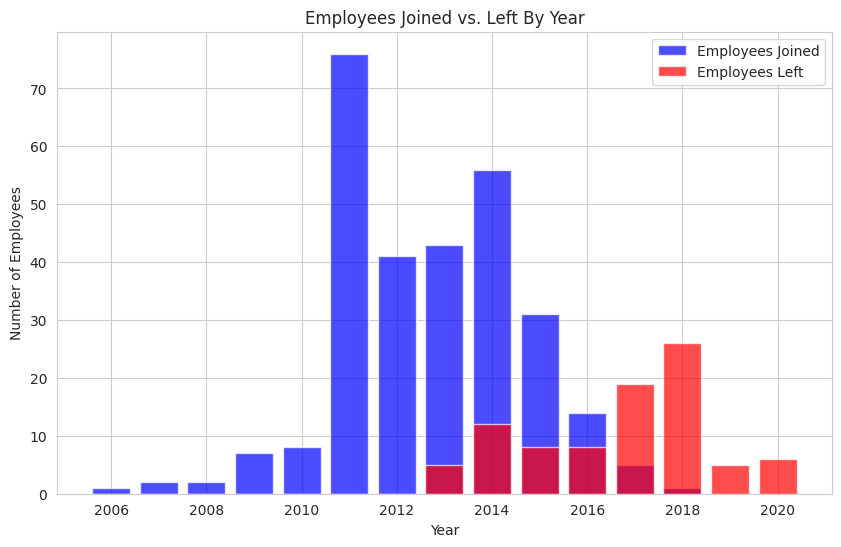

In [ ]:
plt.figure(figsize=(10, 6))

# Plot jumlah karyawan yang masuk (bar biru)
plt.bar(employee_changes['TahunHiring'], employee_changes['JumlahKaryawanMasuk'], color='blue', label='Employees Joined', alpha=0.7)

# Plot jumlah karyawan yang keluar (bar merah)
plt.bar(employee_changes['TahunHiring'], employee_changes['JumlahKaryawanKeluar'], color='red', label='Employees Left', alpha=0.7)

# Menambahkan label dan judul
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Employees Joined vs. Left By Year')
plt.legend()
plt.grid(True)

plt.show()
